# Comparando os algoritmos DQN, A2C e PPO

O objetivo deste projeto é comparar três algoritmos de reinforcement learning considerando alguns ambientes disponíveis na biblioteca [Gymnasium](https://gymnasium.farama.org/). Os algoritmos que serão comparados são [DQN](https://arxiv.org/abs/1312.5602), [A2C](https://arxiv.org/abs/1602.01783) e [PPO](https://arxiv.org/abs/1707.06347).

Os ambientes que serão utilizados na comparação são: 
* [Bipedal Walker](https://gymnasium.farama.org/environments/box2d/bipedal_walker/);
* [Car Racing](https://gymnasium.farama.org/environments/box2d/car_racing/), versão discreta e contínua;
* [Cart Pole](https://gymnasium.farama.org/environments/classic_control/cart_pole/), e;
* [Lunar Lander](https://gymnasium.farama.org/environments/box2d/lunar_lander/)

Todas as implementações dos algoritmos citados acima serão feitas utilizando a biblioteca [Stable Baselines 3](https://stable-baselines3.readthedocs.io/en/master/).

## Ambiente Cart Pole

O ambiente [Cart Pole](https://gymnasium.farama.org/environments/classic_control/cart_pole/) é um ambiente de controle clássico com ações discretas. 

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

attr = ['time/total_timesteps','time/time_elapsed','rollout/ep_rew_mean']

sns.set_theme(style="darkgrid")
cartpole_dqn = pd.read_csv('results/cartpole_dqn/progress1.csv')
cartpole_dqn = cartpole_dqn[attr]

cartpole_ppo_env8 = pd.read_csv('results/cartpole_ppo_env8/progress1.csv')
cartpole_ppo_env8 = cartpole_ppo_env8[attr]

cartpole_ppo_env4 = pd.read_csv('results/cartpole_ppo_env4/progress1.csv')
cartpole_ppo_env4 = cartpole_ppo_env4[attr]

cartpole_ppo_env1 = pd.read_csv('results/cartpole_ppo_env_1/progress1.csv')
cartpole_ppo_env1 = cartpole_ppo_env1[attr]

cartpole_a2c_env1 = pd.read_csv('results/cartpole_a2c_env1/progress1.csv')
cartpole_a2c_env1 = cartpole_a2c_env1[attr]

# round 2

cartpole_dqn_r2 = pd.read_csv('results/cartpole_dqn/progress.csv')
cartpole_dqn_r2 = cartpole_dqn_r2[attr]

cartpole_ppo_env8_r2 = pd.read_csv('results/cartpole_ppo_env8/progress.csv')
cartpole_ppo_env8_r2 = cartpole_ppo_env8_r2[attr]

cartpole_ppo_env4_r2 = pd.read_csv('results/cartpole_ppo_env4/progress.csv')
cartpole_ppo_env4_r2 = cartpole_ppo_env4_r2[attr]

cartpole_ppo_env1_r2 = pd.read_csv('results/cartpole_ppo_env_1/progress.csv')
cartpole_ppo_env1_r2 = cartpole_ppo_env1_r2[attr]

cartpole_a2c_env1_r2 = pd.read_csv('results/cartpole_a2c_env1/progress.csv')
cartpole_a2c_env1_r2 = cartpole_a2c_env1_r2[attr]

In [25]:
cartpole_dqn['algol'] = 'DQN'
cartpole_ppo_env8['algol'] = 'PPO_env8'
cartpole_ppo_env4['algol'] = 'PPO_env4'
cartpole_ppo_env1['algol'] = 'PPO_env1'
cartpole_a2c_env1['algol'] = 'A2C_env1'

cartpole_dqn_r2['algol'] = 'DQN'
cartpole_ppo_env8_r2['algol'] = 'PPO_env8'
cartpole_ppo_env4_r2['algol'] = 'PPO_env4'
cartpole_ppo_env1_r2['algol'] = 'PPO_env1'
cartpole_a2c_env1_r2['algol'] = 'A2C_env1'


df = pd.concat([
    cartpole_dqn, 
    cartpole_ppo_env8, 
    cartpole_ppo_env1, 
    cartpole_a2c_env1, 
    cartpole_ppo_env4,
    cartpole_dqn_r2, 
    cartpole_ppo_env8_r2, 
    cartpole_ppo_env1_r2, 
    cartpole_a2c_env1_r2, 
    cartpole_ppo_env4_r2])

Neste ambiente o algoritmo DQN foi executado com os hiperparâmetros padrão da implementação stable baselines, ou seja: 

```python
learning_rate=1e-4,
gamma=0.99,
bufer_size=1_000_000,
batch_size=32,
tau=1.0,
target_update_interval=10_000,
exploration_initial_eps=1.0,
exploration_final_eps=0.05
```

O algoritmo A2C também foi executado com os hiperparâmetros padrão da implementação stable baselines, ou seja: `learning_rate=0.0007` e `gamma=0.99`

O algoritmo PPO foi executado considerando três configurações distintas, com 1, 4 e 8 environment. Os demais hiperparâmetros permaneceram os mesmos da configuração padrão. 

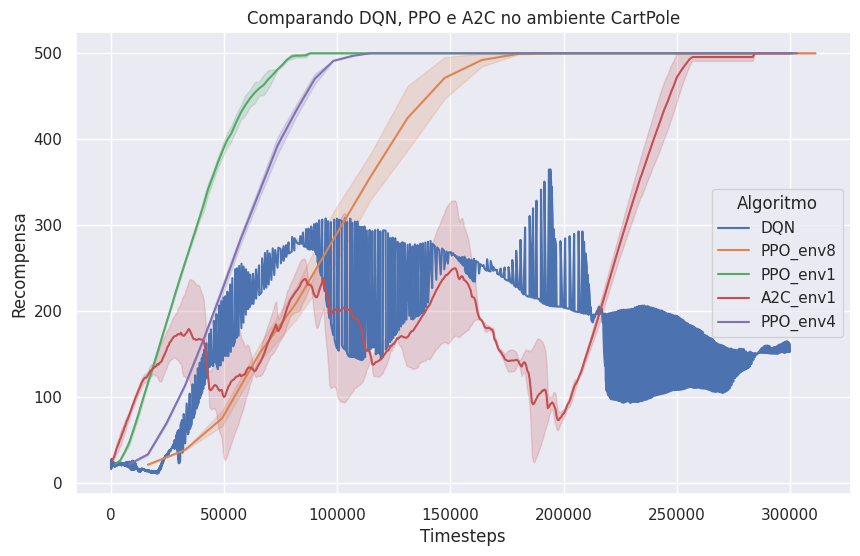

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="time/total_timesteps", y="rollout/ep_rew_mean", hue='algol', data=df)
plt.xlabel('Timesteps')
plt.ylabel('Recompensa')
plt.title('Comparando DQN, PPO e A2C no ambiente CartPole')
plt.legend(title='Algoritmo')
plt.show()

A partir do gráfico apresentado acima, é possível observar que o algoritmo DQN obteve um desempenho inferior em relação aos demais algoritmos. O algoritmo A2C obteve um desempenho superior ao DQN, mas inferior ao PPO. O algoritmo A2C tem um comportamento muito instável no início, mas ao final consegue convergir com um recompensa similar ao PPO. O algoritmo PPO, independente da quantidade de environments, obteve o melhor desempenho, com uma convergência mais rápida e uma recompensa acumulada maior em relação aos demais algoritmos.

## Bipedal Walker

O ambiente [Bipedal Walker](https://gymnasium.farama.org/environments/box2d/bipedal_walker/) é um ambiente de controle contínuo. O objetivo deste ambiente é fazer com que um robô bípede ande o maior percurso possível sem cair.

Para este ambiente foram testados três configurações de algoritmos: 

* A2C:

```python
model = A2C(
   policy = "MlpPolicy",
   env = vec_env, # configuração com 1 environment
   learning_rate=0.00096, 
   n_steps=8, 
   gamma=0.99, 
   gae_lambda= 0.9,
   vf_coef= 0.4,
   ent_coef= 0.0,
   max_grad_norm= 0.5,
```

* PPO com clip_range de 0.2 e gamma de 0.99, demais configurações padrão da implementação stable baselines; 

* PPO com clip_range de 0.18 e gamma de 0.999, demais configurações padrão da implementação stable baselines. Esta configuração foi obtida a partir do site [Hugging Face](https://huggingface.co/sb3).

In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

walker_ppo_env1 = pd.read_csv('results/bipedalwalker_ppo/progress.csv')
walker_ppo_env1 = walker_ppo_env1[attr]

walker_a2c_env1 = pd.read_csv('results/bipedal_walker_a2c/progress.csv')
walker_a2c_env1 = walker_a2c_env1[attr]

walker_ppo_hf = pd.read_csv('results/bipedalwalker_ppo_hugging_face/progress.csv')
walker_ppo_hf = walker_ppo_hf[attr]


In [28]:
walker_a2c_env1['algol'] = 'A2C'
walker_ppo_env1['algol'] = 'PPO clip=0.2'
walker_ppo_hf['algol'] = 'PPO clip=0.18'

df = pd.concat([
    walker_ppo_env1, 
    walker_a2c_env1,
    walker_ppo_hf])

In [29]:
df = df.reset_index(drop=True)

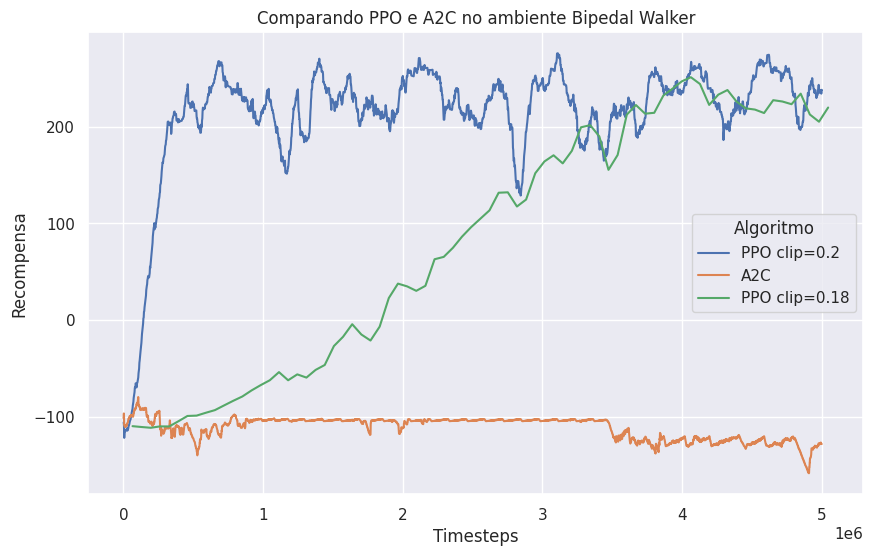

In [30]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="time/total_timesteps", y="rollout/ep_rew_mean", hue='algol', data=df)
plt.xlabel('Timesteps')
plt.ylabel('Recompensa')
plt.title('Comparando PPO e A2C no ambiente Bipedal Walker')
plt.legend(title='Algoritmo')
plt.show()

A partir do gráfico apresentado acima, é possível observar que o algoritmo A2C obteve um desempenho inferior em relação aos demais algoritmos. O algoritmo PPO com clip_range de 0.2 e gamma de 0.99 teve uma convergência mais rápida com algumas oscilações. O algotimo PPO com clip_range de 0.18 e gamma de 0.999 obteve uma convergência mais lenta. No entanto, sem oscilações e com uma recompensa final similar ao PPO com clip_range de 0.2 e gamma de 0.99.

## Lunar Lander

O ambiente [Lunar Lander](https://gymnasium.farama.org/environments/box2d/lunar_lander/) é um ambiente de controle com espaço de ações discreto. O objetivo deste ambiente é fazer com que uma nave lunar pouse na plataforma de pouso.

Neste ambiente foram testadas algumas configurações com os algoritmos A2C, DQN e PPO. As configurações testadas foram: 

* PPO_env1: 

```python
env = gym.make("LunarLander-v2")
vec_env = make_vec_env("LunarLander-v2", n_envs=1)
model = PPO("MlpPolicy", vec_env, verbose=1)
```

* DQN_env1: 

```python
model = DQN(
    policy="MlpPolicy",
    env=vec_env,
    learning_rate=1e-3,
    buffer_size=1_000,
    batch_size=64,
    gamma=0.99,
    exploration_fraction=0.1,
    exploration_initial_eps=0.9,
    exploration_final_eps=0.02,
    tau=1,
```

* A2C_env1: 

```python
env = gym.make("LunarLander-v2")
model = A2C(policy = "MlpPolicy", env = env)
```

* A2C_env8: 

```python
env = make_vec_env("LunarLander-v2", n_envs=8)
model = A2C(
   policy = "MlpPolicy",
   env = env, 
   learning_rate=1e-2, 
   gamma=0.99, 
```

In [31]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

attr = ['time/total_timesteps','time/time_elapsed','rollout/ep_rew_mean']

lunar_lander_ppo_env1 = pd.read_csv('results/lunar_lander_ppo_env_1/progress1.csv')
lunar_lander_ppo_env1 = lunar_lander_ppo_env1[attr]

lunar_lander_dqn = pd.read_csv('results/lunarlander_dqn/progress1.csv')
lunar_lander_dqn = lunar_lander_dqn[attr]

lunar_lander_a2c_env1 = pd.read_csv('results/lunar_lander_a2c_env1/progress1.csv')
lunar_lander_a2c_env1 = lunar_lander_a2c_env1[attr]

lunar_lander_a2c_env8 = pd.read_csv('results/lunarlander_a2c_env_8/progress1.csv')
lunar_lander_a2c_env8 = lunar_lander_a2c_env8[attr]

#
# round 2

lunar_lander_ppo_env1_rd2 = pd.read_csv('results/lunar_lander_ppo_env_1/progress.csv')
lunar_lander_ppo_env1_rd2 = lunar_lander_ppo_env1_rd2[attr]

lunar_lander_dqn_rd2 = pd.read_csv('results/lunarlander_dqn/progress.csv')
lunar_lander_dqn_rd2 = lunar_lander_dqn_rd2[attr]

lunar_lander_a2c_env1_rd2 = pd.read_csv('results/lunar_lander_a2c_env1/progress.csv')
lunar_lander_a2c_env1_rd2 = lunar_lander_a2c_env1_rd2[attr]

lunar_lander_a2c_env8_rd2 = pd.read_csv('results/lunarlander_a2c_env_8/progress.csv')
lunar_lander_a2c_env8_rd2 = lunar_lander_a2c_env8_rd2[attr]



In [32]:
lunar_lander_ppo_env1['algol'] = 'PPO_env1'
lunar_lander_dqn['algol'] = 'DQN_env1'  
lunar_lander_a2c_env1['algol'] = 'A2C_env1'
lunar_lander_a2c_env8['algol'] = 'A2C_env8'

lunar_lander_ppo_env1_rd2['algol'] = 'PPO_env1'
lunar_lander_dqn_rd2['algol'] = 'DQN_env1'  
lunar_lander_a2c_env1_rd2['algol'] = 'A2C_env1'
lunar_lander_a2c_env8_rd2['algol'] = 'A2C_env8'

df = pd.concat([
    lunar_lander_ppo_env1,
    lunar_lander_dqn,
    lunar_lander_a2c_env1,
    lunar_lander_a2c_env8,
    lunar_lander_ppo_env1_rd2,
    lunar_lander_dqn_rd2,
    lunar_lander_a2c_env1_rd2,
    lunar_lander_a2c_env8_rd2])

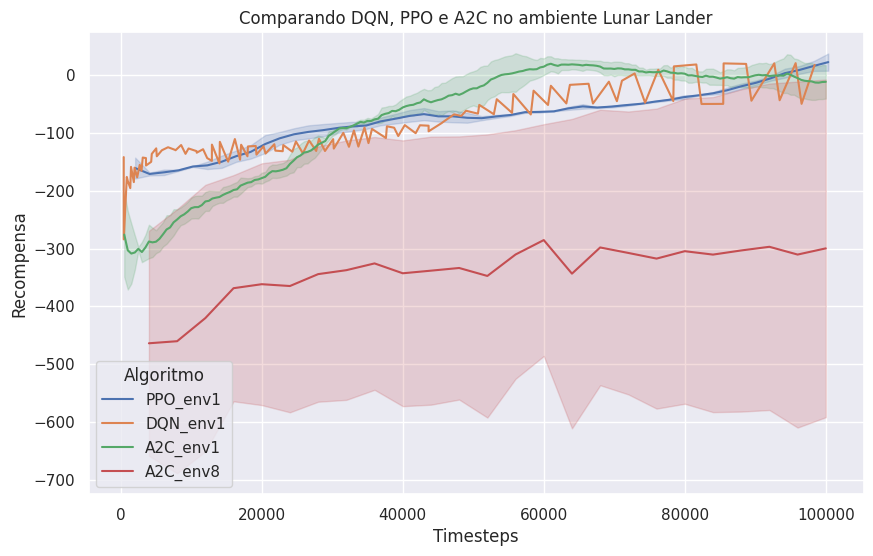

In [33]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="time/total_timesteps", y="rollout/ep_rew_mean", hue='algol', data=df)
plt.xlabel('Timesteps')
plt.ylabel('Recompensa')
plt.title('Comparando DQN, PPO e A2C no ambiente Lunar Lander')
plt.legend(title='Algoritmo')
plt.show()

Ao analisar o gráfico acima, é possível observar que os algoritmos AC2_env1 e PPO_env1 obtiveram as melhores curvas de aprendizado. Mais estáveis e com uma recompensa média maior. 

## Car racing discreto

O ambiente [Car Racing](https://gymnasium.farama.org/environments/box2d/car_racing/) é um ambiente de controle com espaço de ações discreto. O objetivo deste ambiente é fazer com que um carro de corrida complete a pista no menor tempo possível.

Foram utilizadas inúmeras configurações para os algoritmos A2C, DQN e PPO. Basicamente, as variações adotadas foram em relação ao número de environments utilizados e com relação a arquitetura da rede neural utilizada (MlpPolicy: uma rede full connected padrão e CnnPolicy: uma CNN).

A estrutura adotada por este ambiente para representar os estados é uma imagem de 96x96 pixels. Portanto, espera-se que a CNN tenha um desempenho superior em relação a MlpPolicy.

In [34]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

attr = ['time/total_timesteps','time/time_elapsed','rollout/ep_rew_mean']

car_racing_discreto_ppo_cnn_env8 = pd.read_csv('results/car_racing_disc_cnn_ppo_env_8/progress.csv')
car_racing_discreto_ppo_cnn_env8 = car_racing_discreto_ppo_cnn_env8[attr]

car_racing_discreto_ppo_cnn_env1 = pd.read_csv('results/car_racing_discrete_cnn_env1/progress.csv')
car_racing_discreto_ppo_cnn_env1 = car_racing_discreto_ppo_cnn_env1[attr]

car_racing_discreto_ppo_mlp_env1 = pd.read_csv('results/car_racing_discrete_mlp_ppo_env1/progress.csv')
car_racing_discreto_ppo_mlp_env1 = car_racing_discreto_ppo_mlp_env1[attr]

car_racing_discreto_dqn_cnn_env1 = pd.read_csv('results/car_racing_discreto_cnn_dqn/progress.csv')
car_racing_discreto_dqn_cnn_env1 = car_racing_discreto_dqn_cnn_env1[attr]

car_racing_discreto_a2c_cnn_env8 = pd.read_csv('results/car_racing_discrete_frameStack_a2c_cnn_env_8/progress.csv')
car_racing_discreto_a2c_cnn_env8 = car_racing_discreto_a2c_cnn_env8[attr]

car_racing_discreto_a2c_mlp_env1 = pd.read_csv('results/car_racing_discrete_mlp_env-1/progress.csv')
car_racing_discreto_a2c_mlp_env1 = car_racing_discreto_a2c_mlp_env1[attr]

car_racing_discreto_a2c_mlp_env8 = pd.read_csv('results/car_racing_discreto_mlp_a2c/progress.csv')
car_racing_discreto_a2c_mlp_env8 = car_racing_discreto_a2c_mlp_env8[attr]

car_racing_discreto_ppo_mlp_env8 = pd.read_csv('results/car_racing_discreto_MLP_ppo_env8/progress.csv')
car_racing_discreto_ppo_mlp_env8 = car_racing_discreto_ppo_mlp_env8[attr]


In [35]:
car_racing_discreto_ppo_cnn_env8['algol'] = 'PPO_env8_cnn'
car_racing_discreto_ppo_cnn_env1['algol'] = 'PPO_env1_cnn'

car_racing_discreto_ppo_mlp_env1['algol'] = 'PPO_env1_mlp'
car_racing_discreto_ppo_mlp_env8['algol'] = 'PPO_env8_mlp'

car_racing_discreto_dqn_cnn_env1['algol'] = 'DQN_env1_cnn'

car_racing_discreto_a2c_cnn_env8['algol'] = 'A2C_env8_cnn'

car_racing_discreto_a2c_mlp_env1['algol'] = 'A2C_env1_mlp'
car_racing_discreto_a2c_mlp_env8['algol'] = 'A2C_env8_mlp'


df = pd.concat([
    car_racing_discreto_ppo_cnn_env8,
    car_racing_discreto_dqn_cnn_env1,
    car_racing_discreto_a2c_cnn_env8,
    car_racing_discreto_ppo_cnn_env1,
    car_racing_discreto_a2c_mlp_env1,
    car_racing_discreto_a2c_mlp_env8,
    car_racing_discreto_ppo_mlp_env1,
    car_racing_discreto_ppo_mlp_env8])

df = df.reset_index(drop=True)

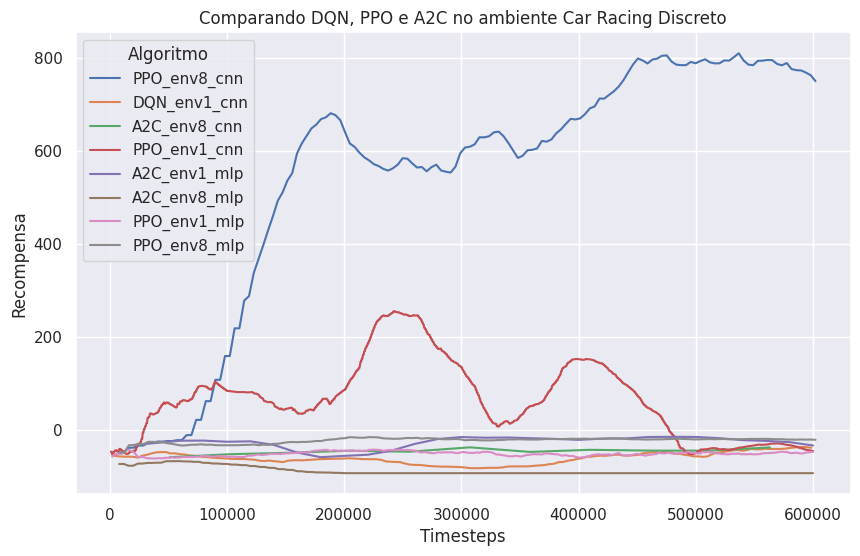

In [36]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="time/total_timesteps", y='rollout/ep_rew_mean', hue='algol', data=df)
plt.xlabel('Timesteps')
plt.ylabel('Recompensa')
plt.title('Comparando DQN, PPO e A2C no ambiente Car Racing Discreto')
plt.legend(title='Algoritmo')
plt.show()

A configuração com melhor desempenho foi a PPO com 8 environments e CnnPolicy. A partir do gráfico acima, é possível observar que a PPO com 8 environments e CnnPolicy obteve uma convergência mais rápida e uma recompensa acumulada maior em relação aos demais algoritmos.

Os hiperparâmetros adotados nesta configuração foram: 

```python
    vec_env = make_vec_env(ENV_NAME, n_envs=8, env_kwargs=env_kwargs)

    model = PPO(
        policy="CnnPolicy",
        env=vec_env,
        clip_range=0.2,
        ent_coef=0.0,
        gae_lambda=0.95,
        n_steps=512,
        n_epochs=10,
        vf_coef=0.5,
        learning_rate=2e-4,
        batch_size=128,
        gamma=0.99,
```

## Car racing contínuo

O ambiente [Car Racing](https://gymnasium.farama.org/environments/box2d/car_racing/) é um ambiente de controle com espaço de ações contínuo. O objetivo deste ambiente é fazer com que um carro de corrida complete a pista no menor tempo possível. Neste ambiente os estados são representados utilizado uma imagem de 96x96 pixels.

As configurações avaliadas neste ambiente foram PPO com MLPolicy e PPO com CNN.

In [37]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

attr = ['time/total_timesteps','time/time_elapsed','rollout/ep_rew_mean']

car_racing_continuo_ppo_mlp_1_env = pd.read_csv('results/car_racing_continous_ppo_mlp_1_env/progress.csv')
car_racing_continuo_ppo_mlp_1_env = car_racing_continuo_ppo_mlp_1_env[attr]

car_racing_continuo_cnn_ppo_env_1 = pd.read_csv('results/car_racing_continuous_cnn_ppo_env_1/progress.csv')
car_racing_continuo_cnn_ppo_env_1 = car_racing_continuo_cnn_ppo_env_1[attr]

In [38]:
car_racing_continuo_ppo_mlp_1_env['algol'] = 'PPO_env1_mlp'
car_racing_continuo_cnn_ppo_env_1['algol'] = 'PPO_env1_cnn'

df = pd.concat([
    car_racing_continuo_ppo_mlp_1_env,
    car_racing_continuo_cnn_ppo_env_1])

df = df.reset_index(drop=True)

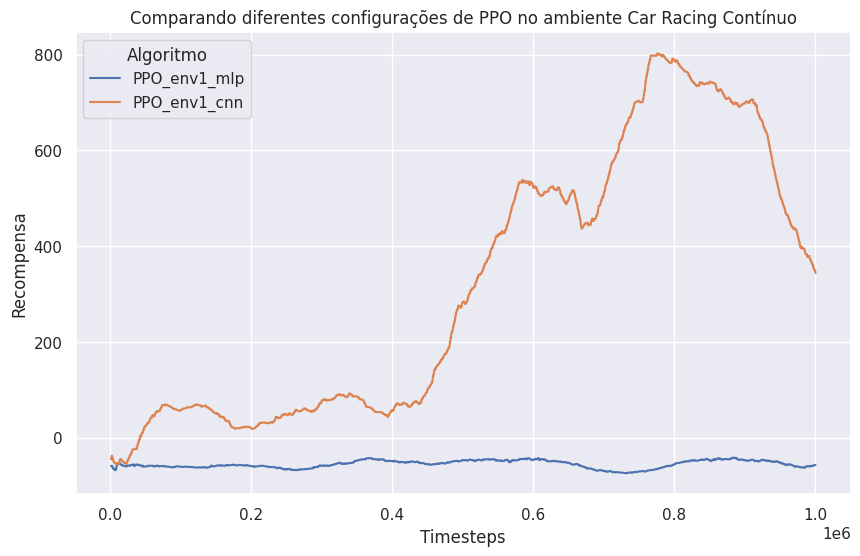

In [39]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="time/total_timesteps", y="rollout/ep_rew_mean", hue='algol', data=df)
plt.xlabel('Timesteps')
plt.ylabel('Recompensa')
plt.title('Comparando diferentes configurações de PPO no ambiente Car Racing Contínuo')
plt.legend(title='Algoritmo')
plt.show()

A partir do gráfico acima, é possível observar que a PPO com CnnPolicy obteve um desempenho superior em relação a PPO com MlpPolicy.

## Considerações finais

Este estudo avaliou três algoritmos de reinforcement learning (A2C, DQN e PPO) em quatro ambientes distintos. As implementações dos algoritmos foram feitas utilizando a biblioteca Stable Baselines 3. Os ambientes utilizados foram ambientes da biblioteca Gymnasium. A comparação dos algoritmos foi feita considerando a recompensa acumulada ao longo do treinamento, ou seja, a curva de aprendizado de cada algoritmo. 

A partir dos experimentos realizados, foi possível observar que o algoritmo PPO obteve um desempenho superior em relação aos demais algoritmos. O algoritmo PPO obteve uma convergência mais rápida e uma recompensa acumulada maior em relação aos demais algoritmos na maioria dos ambientes avaliados.

A forma como os hiperparâmetros foram definidos para cada algoritmo e ambiente pode ter influenciado nos resultados obtidos. A escolha dos hiperparâmetros foi feita de forma arbitrária e não foi feita uma busca sistemática dos melhores hiperparâmetros para cada algoritmo e ambiente.

O uso da biblioteca Stable Baseline 3 facilitou a implementação dos algoritmos e a avaliação dos resultados. Isto só foi possível porque os ambientes utilizados implementam a interface da [biblioteca Gymnasium](https://gymnasium.farama.org/tutorials/gymnasium_basics/environment_creation/#sphx-glr-tutorials-gymnasium-basics-environment-creation-py).

Considerando os resultados obtidos por este estudo, é possível concluir que o algoritmo PPO é uma boa escolha para problemas que podem ser resolvidos com reinforcement learning. Além disso, dado um novo problema, é possível desenvolver um ambiente usando a biblioteca Gymnasium e testar o algoritmo PPO com a implementação do stable baseline para verificar se ele é capaz de encontrar uma política ótima. Neste caso, a equipe responsável pelo desenvolvimento do agente deve-se preocupar em definir os estados, ações e recompensas do ambiente de forma adequada para que o algoritmo PPO possa aprender a política ótima. Em outras palavras, o foco do desenvolvimento fica na definição do ambiente e não na implementação do algoritmo de reinforcement learning.